# Exercise XP

For this exercise, we will use the Titanic dataset


https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

Do the following:

- Define what are the categorical features and what are the continuous features. Be sure to define ordinal vs nominal.


- Explore the data. Print any important summary statistics. Plot the distributions of each feature. Plot any important relationships of each feature on the target variable or on each other.

(You can use Seaborn as well)


    



In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [32]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The categorical features takes on a limited, and usually fixed, number of possible values
For example in our df : 'gender', 'survived','Pclass'

The continuous features takes unlimited values    For example: 'Fare', 'Age' 

We can transform a continuous features to a categorical features using binning

Nominal data is defined as data that is used for naming or labelling variables, without any quantitative value.

Ordinal data is a type of categorical data with an order. The variables in ordinal data are listed in an ordered manner.
The ordinal variables are usually numbered, so as to indicate the order of the list

In [33]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [34]:
df.groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


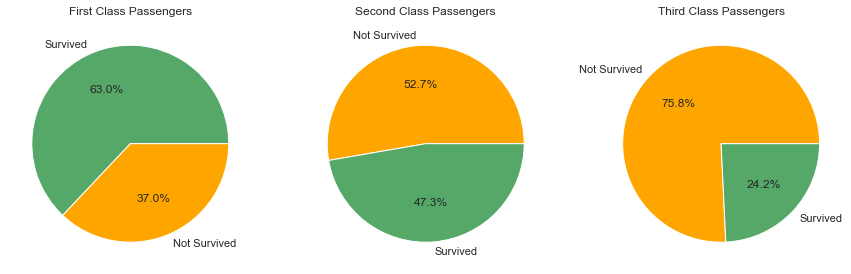

In [35]:
pclass_one = df[df.Pclass == 1].Survived.value_counts(normalize=True)
pclass_two = df[df.Pclass == 2].Survived.value_counts(normalize=True)
pclass_three = df[df.Pclass == 3].Survived.value_counts(normalize=True)

colors = ['orange','g']

fig, ax = plt.subplots(1,3, figsize=(15,6))
ax[0].pie(pclass_one, labels = pclass_one.index.map({0:'Not Survived', 1:'Survived'}),colors=['g','orange'], autopct='%1.1f%%')
ax[0].set_title("First Class Passengers")
ax[1].pie(pclass_two, labels = pclass_two.index.map({0:'Not Survived', 1:'Survived'}),colors=colors, autopct='%1.1f%%')
ax[1].set_title("Second Class Passengers")
ax[2].pie(pclass_three, labels = pclass_three.index.map({0:'Not Survived', 1:'Survived'}),colors=colors, autopct='%1.1f%%')
ax[2].set_title("Third Class Passengers")



plt.show()


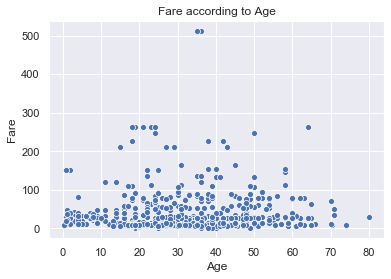

In [36]:
sns.set()

plt.title('Fare according to Age')
graph = sns.scatterplot(x='Age', y='Fare', data=df)

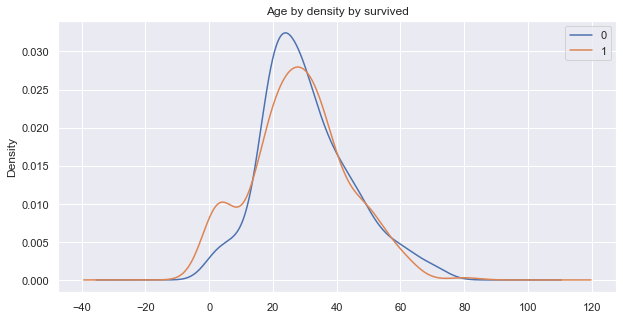

In [37]:
x = df.groupby('Survived')["Age"]
x.plot(kind='kde', figsize=(10, 5))

plt.legend()
plt.title('Age by density by survived')
plt.show()


- Process the data as you’ve learned in the lesson:

    - Figure out what you want to do with the nan values
    - Figure out the best way to make the categorical features numeric as we’ve learned
    - Scale the continuous features and transform or categorize any feature.
    - Deal with any outliers (both categorical and continuous)
    - Remove any columns you feel are not important and explain why.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [39]:
# Figure out what you want to do with the nan values
#df['Age_Fill'] = df['Age'].groupby([df['Pclass'], df['Sex']]).apply(lambda x: x.fillna(x.mean()))


df.dropna(subset = ["Age"], inplace=True)

In [40]:
# Figure out the best way to make the categorical features numeric as we’ve learned
# sex_dict={'female':1,'male':0}
# df['encoded_sex'] = df['Sex'].map(lambda x: sex_dict[x])

#better way
le =preprocessing.LabelEncoder()
df['encoded_sex'] = le.fit_transform(df['Sex'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,encoded_sex
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [11]:
embarked_dict={'S':1,'C':0,'Q':2}
df['encoded_embarked'] = df['Embarked'].dropna().map(lambda x: embarked_dict[x])

In [13]:
# Scale the continuous features and transform or categorize any feature.
from sklearn.preprocessing import MinMaxScaler, StandardScaler
mm_scaler = MinMaxScaler()

continuous_features = ['SibSp', 'Parch', 'Fare']
mm_scaler.fit_transform(df[continuous_features])

array([[0.2       , 0.        , 0.01415106],
       [0.2       , 0.        , 0.13913574],
       [0.        , 0.        , 0.01546857],
       ...,
       [0.        , 0.        , 0.0585561 ],
       [0.        , 0.        , 0.0585561 ],
       [0.        , 0.        , 0.01512699]])

In [14]:
# Deal with any outliers (both categorical and continuous)


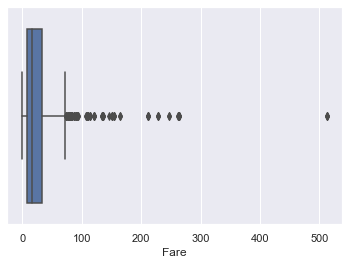

In [15]:
ax = sns.boxplot(x=df["Fare"])

In [16]:
df = df[df.Fare<300]

C:\Users\yonab\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


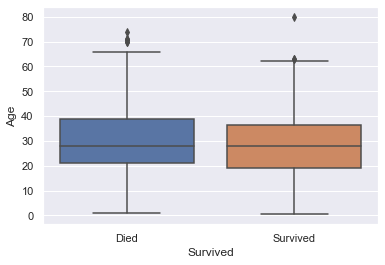

In [17]:
df['Survived'] = df['Survived'].map({
    0: 'Died',
    1: 'Survived'
})
ax = sns.boxplot(x=df['Survived'], y=df["Age"])
plt.show()

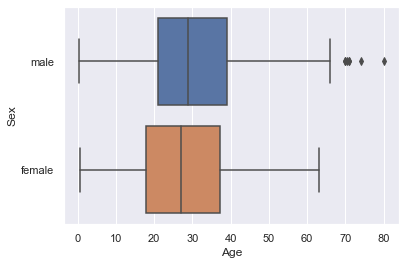

In [18]:
ax = sns.boxplot(x=df['Age'], y=df["Sex"])

In [19]:
df =df[df['Age']<65]

In [20]:
#Remove any columns you feel are not important and explain why.
# Name  because it does not help us to understand the data
# Ticket is unique so useless
df.drop(['Name','Ticket'], inplace=True,axis=1)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,encoded_sex,encoded_embarked
0,1,Died,3,male,22.0,1,0,7.2500,NaN,S,0,1.0
1,2,Survived,1,female,38.0,1,0,71.2833,C85,C,1,0.0
2,3,Survived,3,female,26.0,0,0,7.9250,NaN,S,1,1.0
3,4,Survived,1,female,35.0,1,0,53.1000,C123,S,1,1.0
4,5,Died,3,male,35.0,0,0,8.0500,NaN,S,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,Died,3,female,39.0,0,5,29.1250,NaN,Q,1,2.0
886,887,Died,2,male,27.0,0,0,13.0000,NaN,S,0,1.0
887,888,Survived,1,female,19.0,0,0,30.0000,B42,S,1,1.0
889,890,Survived,1,male,26.0,0,0,30.0000,C148,C,0,0.0


- Split the data into train and test sets.
Do it randomly and also do it by a certain feature. Explain why you chose that feature.

Don’t forget about stratifying the target variable

In [21]:
from sklearn.model_selection import train_test_split
# y target => survived
y=df['Survived']


In [22]:
# x => others
X = df.copy()
X.drop(['Survived'],inplace=True,axis=1)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)